<a href="https://colab.research.google.com/github/SidBagwe/Task3_UnsupervisedLearning/blob/master/Task3_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.cluster import KMeans

Loading the dataset


In [9]:
data = pd.read_csv('/content/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Checking the data

In [10]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

Visualising data

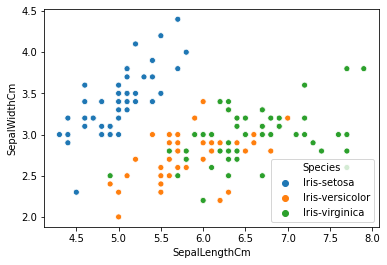

In [14]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=data, hue="Species")

Choosing the number of clusters

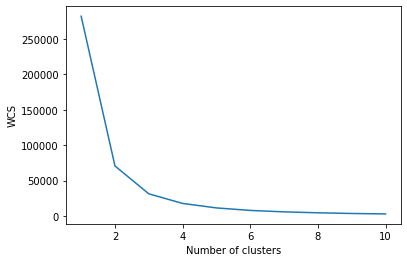

In [19]:
X = data.iloc[:, [0, 1, 2, 3]].values

wcs = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcs.append(kmeans.inertia_)

plt.plot(range(1, 11), wcs)
plt.xlabel('Number of clusters')
plt.ylabel('WCS') # Within cluster
plt.show()

It can be seen that the optimim number of clusters is 3 using the elbow method

Applying Kmeans


In [25]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


Plotting the data


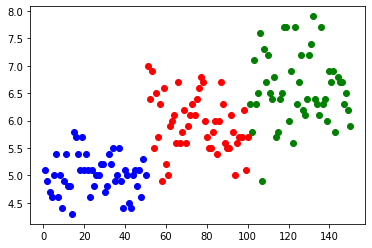

In [28]:
plt.scatter(X[kmeans.labels_ == 0, 0], X[kmeans.labels_ == 0, 1],
            c='green', label='cluster 1')

plt.scatter(X[kmeans.labels_ == 1, 0], X[kmeans.labels_ == 1, 1],
            c='blue', label='cluster 2')

plt.scatter(X[kmeans.labels_ == 2, 0], X[kmeans.labels_ == 2, 1],
            c='red', label='cluster 3')